In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
plt.style.use('ggplot')

In [3]:
mpg = pd.read_csv('datasets/auto-mpg.csv')
mpg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s
...,...,...,...,...,...,...,...,...,...,...,...,...
387,18.0,6,250.0,88,3021,16.5,73,US,ford maverick,red,25.351225,o
388,27.0,4,151.0,90,2950,17.3,82,US,chevrolet camaro,blue,24.173611,o
389,29.5,4,98.0,68,2135,16.6,78,Asia,honda accord lx,blue,12.661736,x
390,17.5,6,250.0,110,3520,16.4,77,US,chevrolet concours,red,34.417778,o


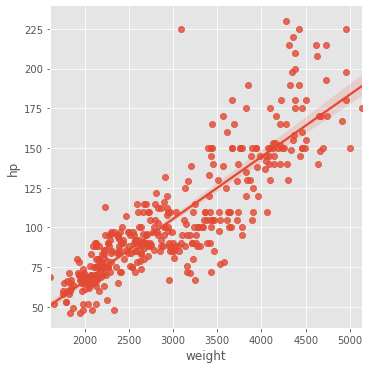

In [4]:
sns.lmplot(x='weight', y='hp', data=mpg)
plt.show()

A **residual** is the vertical distance between a data point and the **regression line**. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line. ... In other words, the residual is the error that isn't explained by the regression line.

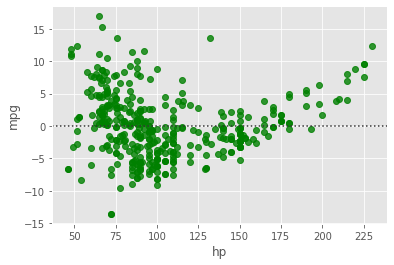

In [5]:
sns.residplot(x='hp', y='mpg', data=mpg, color='green')
plt.show()

Difference between `sns.lmplot` and `sns.regplot`
* A principal difference between sns.lmplot() and sns.regplot() is the way in which matplotlib options are passed (sns.regplot() is more permissive).
* For both sns.lmplot() and sns.regplot(), the keyword order is used to control the order of polynomial regression.
* The function sns.regplot() uses the argument scatter=None to prevent plotting the scatter plot points again.
* `lmplot` has argument hue (kinda group by data in column)

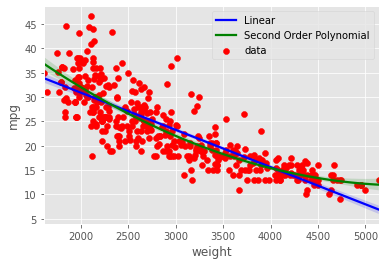

In [6]:
plt.scatter(mpg['weight'], mpg['mpg'], label='data', color='red', marker='o')

sns.regplot(x='weight', y='mpg', data=mpg, color='blue', scatter=None, label='Linear')
sns.regplot(x='weight', y='mpg', data=mpg, order=2, color='green', scatter=None, label='Second Order Polynomial')

plt.legend(loc='upper right')
plt.show()

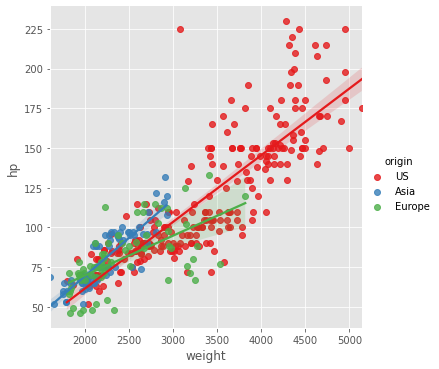

In [7]:
# hue - groups data by column on one plot
sns.lmplot(x='weight', y='hp', data=mpg, hue='origin', palette='Set1')
plt.show()

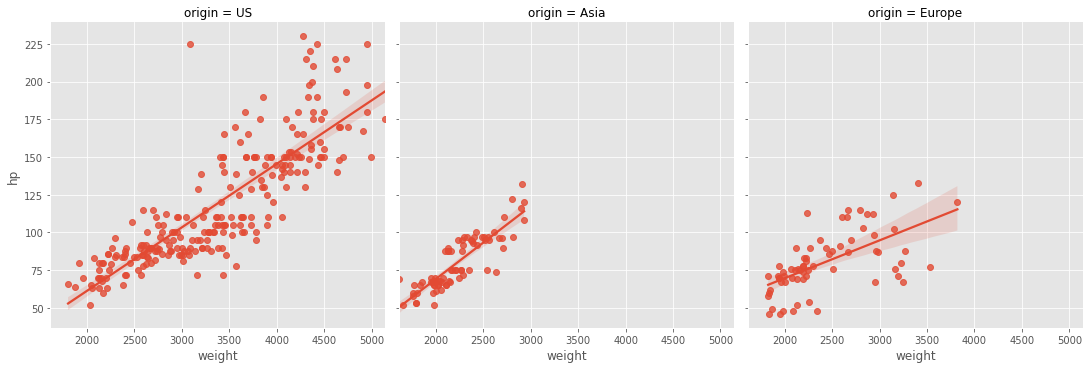

In [8]:
# col OR row - groups data by column on different subplots
sns.lmplot(x='weight', y='hp', data=mpg, col='origin')
plt.show()

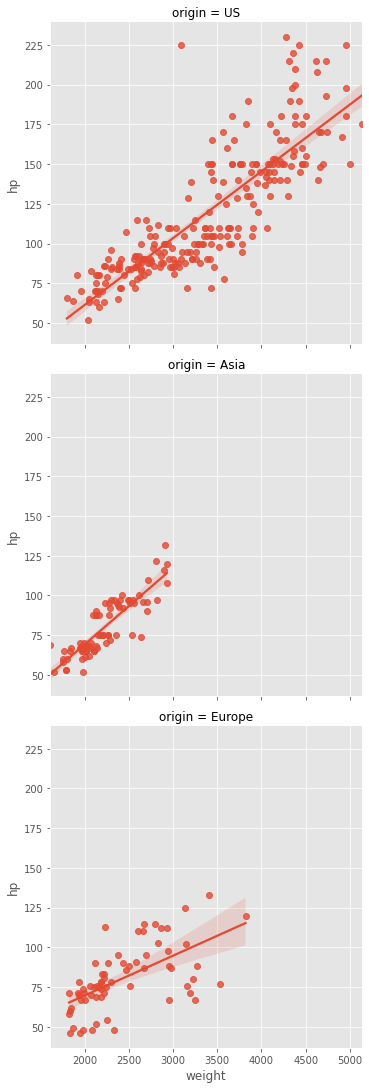

In [9]:
sns.lmplot(x='weight', y='hp', data=mpg, row='origin')
plt.show()

# Visualizing univariate distributions


In [10]:
tips = pd.read_csv('datasets/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## `sns.stripplot`

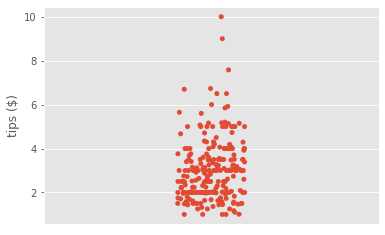

In [11]:
# jitter=True - prevents overlap
sns.stripplot(y='tip', data=tips, orient='v', jitter=True, marker='o', edgecolor='black')
plt.ylabel('tips ($)')
plt.xticks([])
plt.show()

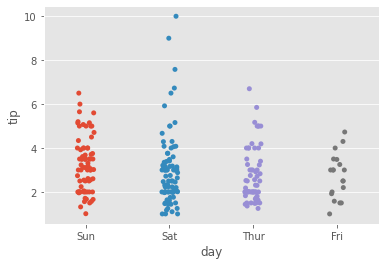

In [12]:
sns.stripplot(x='day', y='tip', data=tips)
plt.show()

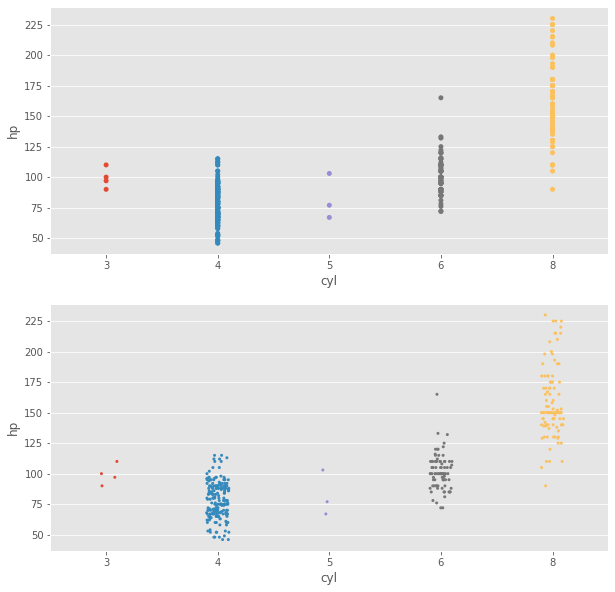

In [13]:
plt.subplots(figsize=(10, 10))
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=mpg, jitter=False)

plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', data=mpg, jitter=True, size=3)

plt.show()

## `sns.swarmplot`

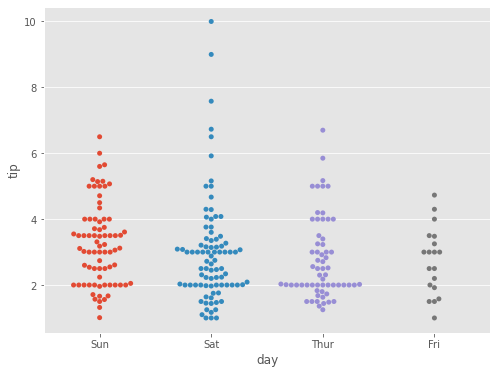

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.swarmplot(ax=ax, x='day', y='tip', data=tips)
plt.show()

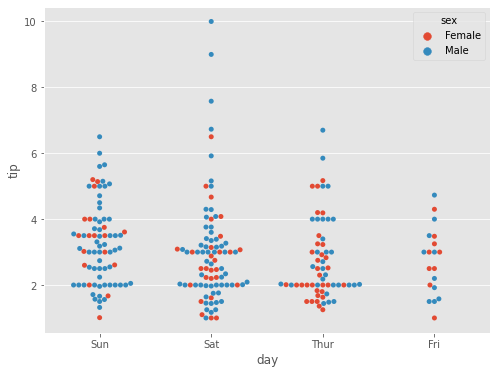

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.swarmplot(ax=ax, x='day', y='tip', data=tips, hue='sex')
plt.show()

## `sns.boxplot` and `sns.violinplot`

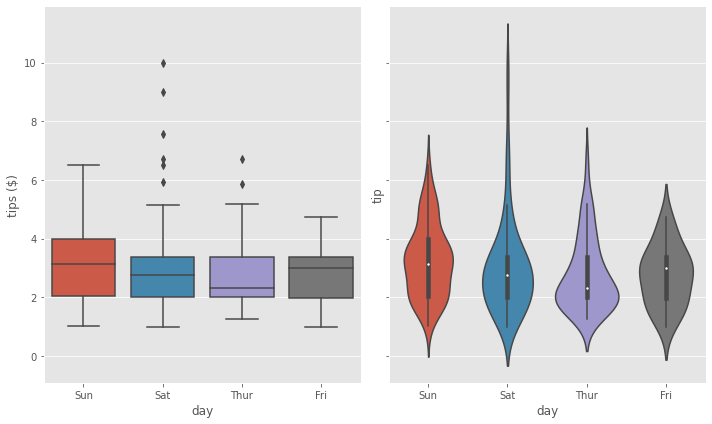

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
sns.boxplot(ax=ax[0], x='day', y='tip', data=tips)
ax[0].set_ylabel('tips ($)')
sns.violinplot(ax=ax[1], x='day', y='tip', data=tips)

plt.tight_layout()
plt.show()

## Combining plots

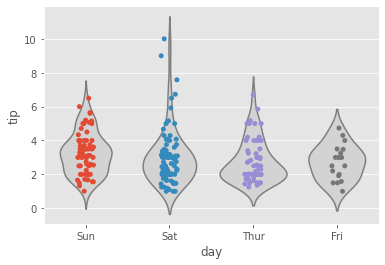

In [17]:
sns.violinplot(x='day', y='tip', data=tips, inner=None, color='lightgrey')
sns.stripplot(x='day', y='tip', data=tips)
plt.show()

## `sns.jointplot`

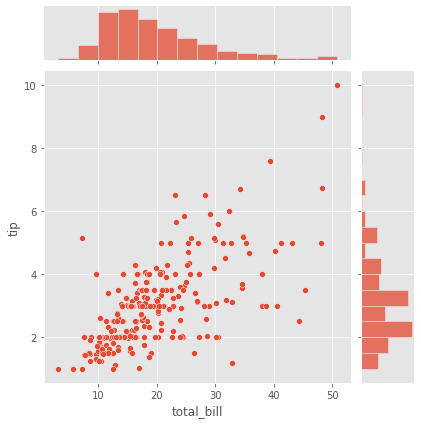

In [18]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

## `sns.pairplot`
For numberical columns only

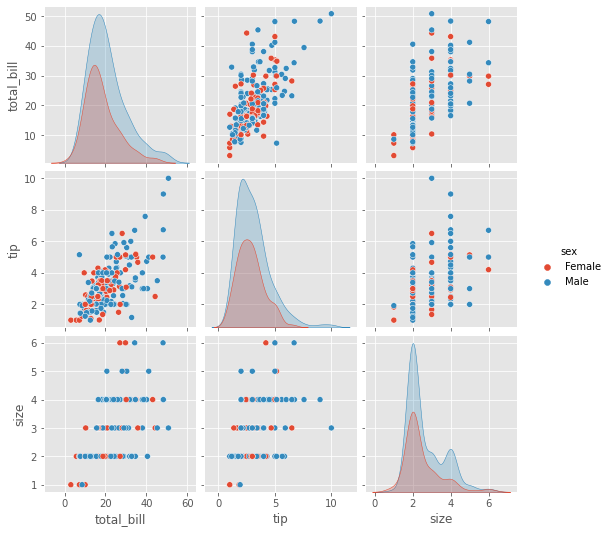

In [19]:
sns.pairplot(tips, hue='sex')
plt.show()

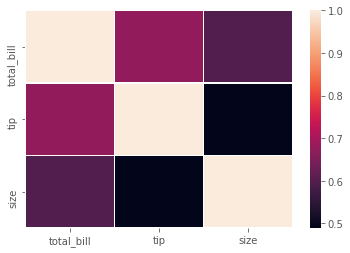

In [20]:
sns.heatmap(tips.corr(), linewidths=.5)
plt.show()

Note that the data is symetrical,and we don't have to display all of it


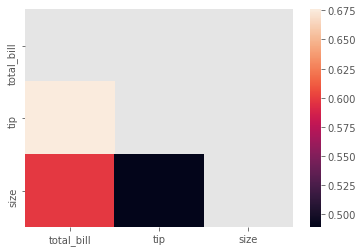

In [21]:
tips_corr = tips.corr()
mask = np.zeros_like(tips_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(tips_corr, mask=mask)
plt.show()